<a href="https://colab.research.google.com/github/SanthoshNagaraj94/mushroom_class_prediction/blob/main/mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom Classification(Edible/Poisnous)


---



# **->Extracting The Data**

Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Read the Mushroom DataSet usung pandas

In [ ]:
data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Get the Shape of Data Set

In [ ]:
data.shape

(8124, 23)

In [ ]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Check The Null Value in DataSet

In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Find The unique values in each Colums(features)

In [ ]:
uniqs=[]
for x in data.columns:
  uniqs.append(data[x].value_counts())
  uniqs.append("******")

uniqs

[e    4208
 p    3916
 Name: class, dtype: int64, '******', x    3656
 f    3152
 k     828
 b     452
 s      32
 c       4
 Name: cap-shape, dtype: int64, '******', y    3244
 s    2556
 f    2320
 g       4
 Name: cap-surface, dtype: int64, '******', n    2284
 g    1840
 e    1500
 y    1072
 w    1040
 b     168
 p     144
 c      44
 r      16
 u      16
 Name: cap-color, dtype: int64, '******', f    4748
 t    3376
 Name: bruises, dtype: int64, '******', n    3528
 f    2160
 s     576
 y     576
 l     400
 a     400
 p     256
 c     192
 m      36
 Name: odor, dtype: int64, '******', f    7914
 a     210
 Name: gill-attachment, dtype: int64, '******', c    6812
 w    1312
 Name: gill-spacing, dtype: int64, '******', b    5612
 n    2512
 Name: gill-size, dtype: int64, '******', b    1728
 p    1492
 w    1202
 n    1048
 g     752
 h     732
 u     492
 k     408
 e      96
 y      86
 o      64
 r      24
 Name: gill-color, dtype: int64, '******', t    4608
 e    3516
 Name:

Changing the alphabets into Readable data as Given in the Data Documentation

In [ ]:
data["class"].replace({"e": "edible", "p": "poisonous"}, inplace=True)


In [ ]:
data["cap-shape"].replace({'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'}, inplace=True)

data["cap-surface"].replace({'g':'grooves','y':'scaly','f':'fibrous','s':'smooth'}, inplace=True)


data["cap-color"].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}, inplace=True)

data["bruises"].replace({'t':'bruises','f':'no'}, inplace=True)


data["odor"].replace({'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'}, inplace=True)

data["gill-attachment"].replace({'a':'attached','f':'free'}, inplace=True)


data["gill-spacing"].replace({'c':'close','w':'crowded'}, inplace=True)

data["gill-size"].replace({'b':'broad','n':'narrow'}, inplace=True)



data["gill-color"].replace({'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}, inplace=True)

data["stalk-shape"].replace({'e':'enlarging','t':'tapering'}, inplace=True)



data["stalk-root"].replace({'b':'bulbous','c':'club','e':'equal','r':'rooted','?':'missing'}, inplace=True)

data["stalk-surface-above-ring"].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}, inplace=True)

data["stalk-surface-below-ring"].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}, inplace=True)


data["stalk-color-above-ring"].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow','o':'orange'}, inplace=True)

data["stalk-color-below-ring"].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow','o':'orange'}, inplace=True)

data["veil-type"].replace({'p':'partial'}, inplace=True)




data["veil-color"].replace({'n':'brown','w':'white','y':'yellow','o':'orange'}, inplace=True)

data["ring-number"].replace({'n':'none','o':'one','t':'two'}, inplace=True)

data["ring-type"].replace({'e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant'}, inplace=True)



data["spore-print-color"].replace({'n':'brown','b':'buff','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow','o':'orange','h':'choclate','k':'black'}, inplace=True)

data["population"].replace({'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'}, inplace=True)

data["habitat"].replace({'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}, inplace=True)





In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [ ]:
classes=data['class']
data.drop(['class'],axis=1,inplace=True)
data['class']=classes

In [ ]:
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses,edible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves,edible
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,missing,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves,poisonous


Get the each coloum Names

In [ ]:
col=data.columns
col

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

Make The count of Each unique values in the Each Column

In [ ]:
uniqs=[]
for x in col:
  uniqs.append(data[x].value_counts())


In [ ]:
uniqs

[convex     3656
 flat       3152
 knobbed     828
 bell        452
 sunken       32
 conical       4
 Name: cap-shape, dtype: int64, scaly      3244
 smooth     2556
 fibrous    2320
 grooves       4
 Name: cap-surface, dtype: int64, brown       2284
 gray        1840
 red         1500
 yellow      1072
 white       1040
 buff         168
 pink         144
 cinnamon      44
 green         16
 purple        16
 Name: cap-color, dtype: int64, no         4748
 bruises    3376
 Name: bruises, dtype: int64, none        3528
 foul        2160
 fishy        576
 spicy        576
 anise        400
 almond       400
 pungent      256
 creosote     192
 musty         36
 Name: odor, dtype: int64, free        7914
 attached     210
 Name: gill-attachment, dtype: int64, close      6812
 crowded    1312
 Name: gill-spacing, dtype: int64, broad     5612
 narrow    2512
 Name: gill-size, dtype: int64, buff         1728
 pink         1492
 white        1202
 brown        1048
 gray          752
 choc

In [ ]:
data['cap-shape'].value_counts()

convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap-shape, dtype: int64

# **EXPLORATORY DATA ANALYSIS**

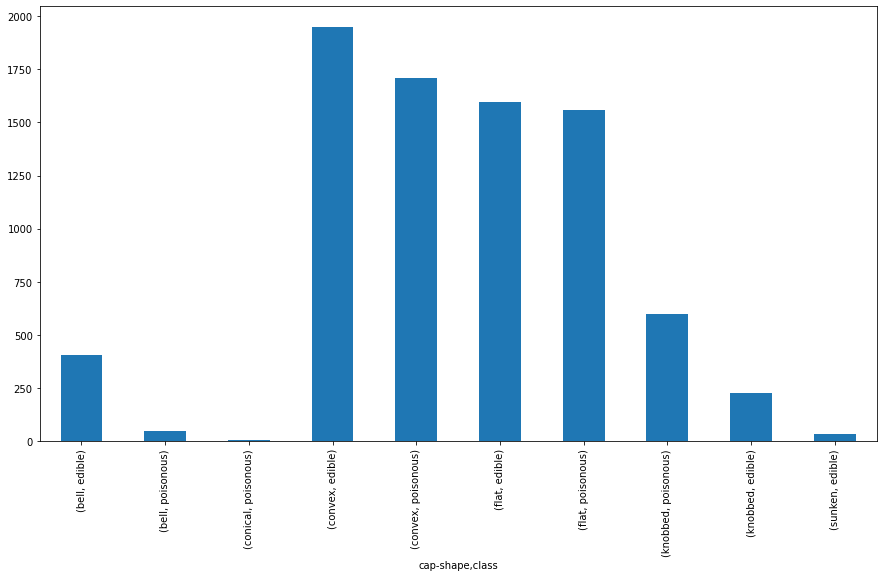

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['cap-shape'])['class'].value_counts().plot(kind='bar')
plt.show()

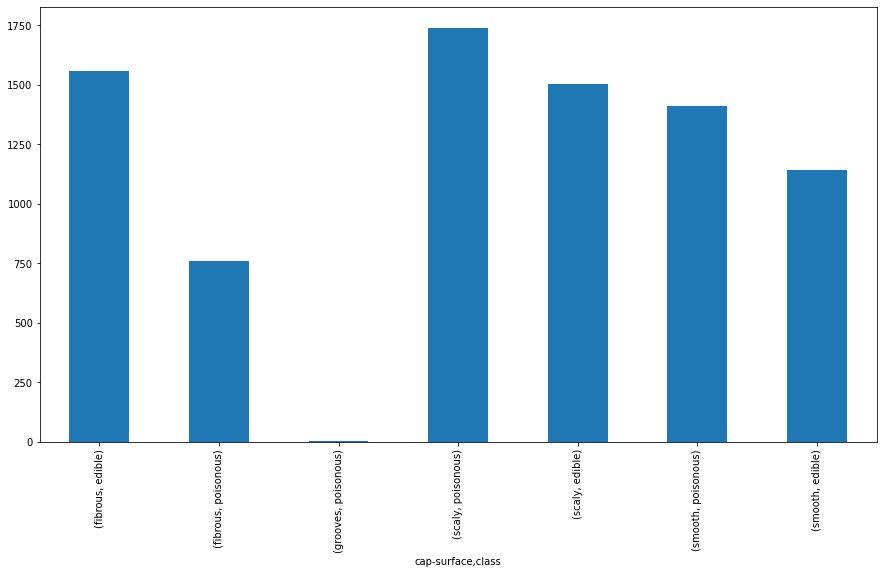

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['cap-surface'])['class'].value_counts().plot(kind='bar')
plt.show()

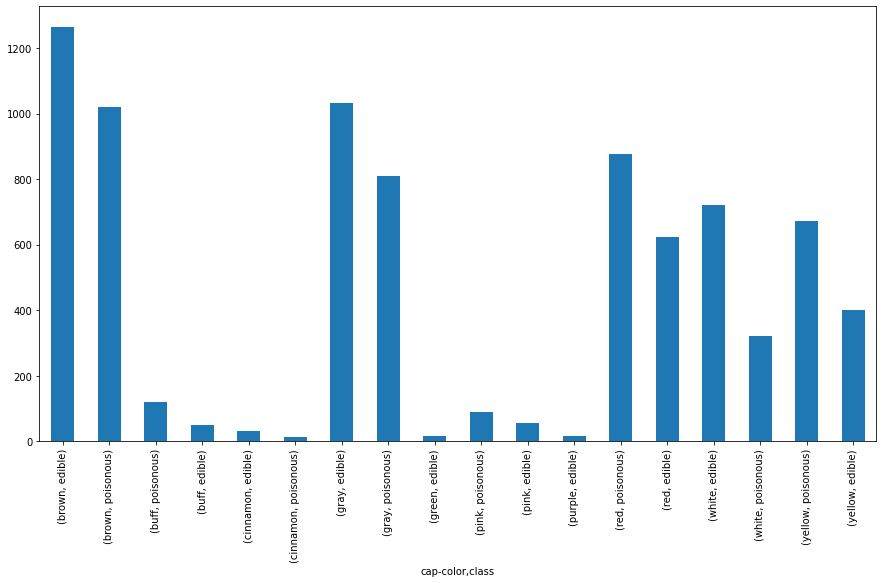

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['cap-color'])['class'].value_counts().plot(kind='bar')
plt.show()

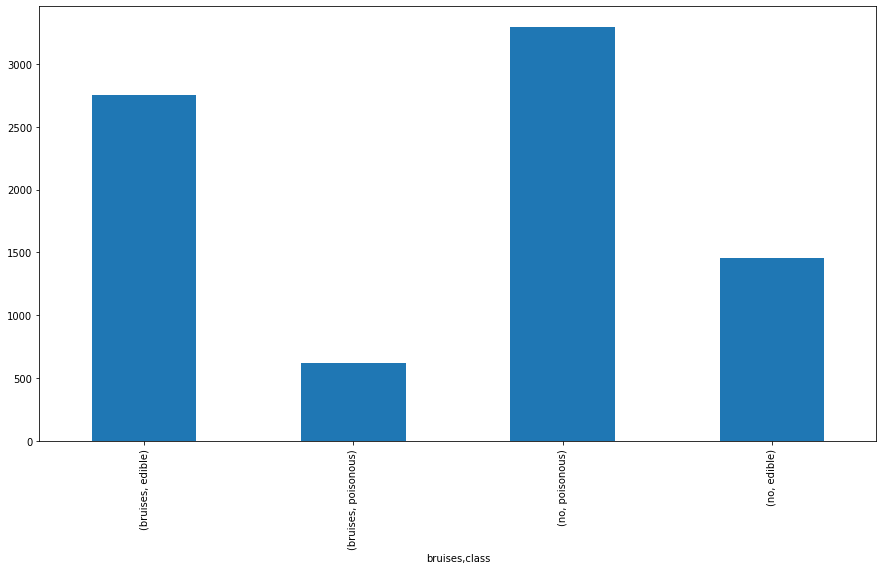

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['bruises'])['class'].value_counts().plot(kind='bar')
plt.show()

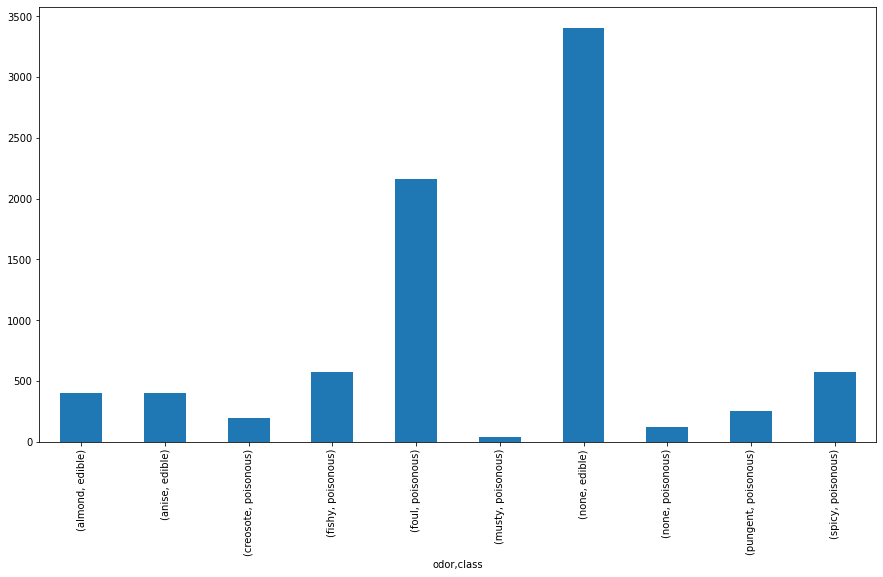

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['odor'])['class'].value_counts().plot(kind='bar')
plt.show()

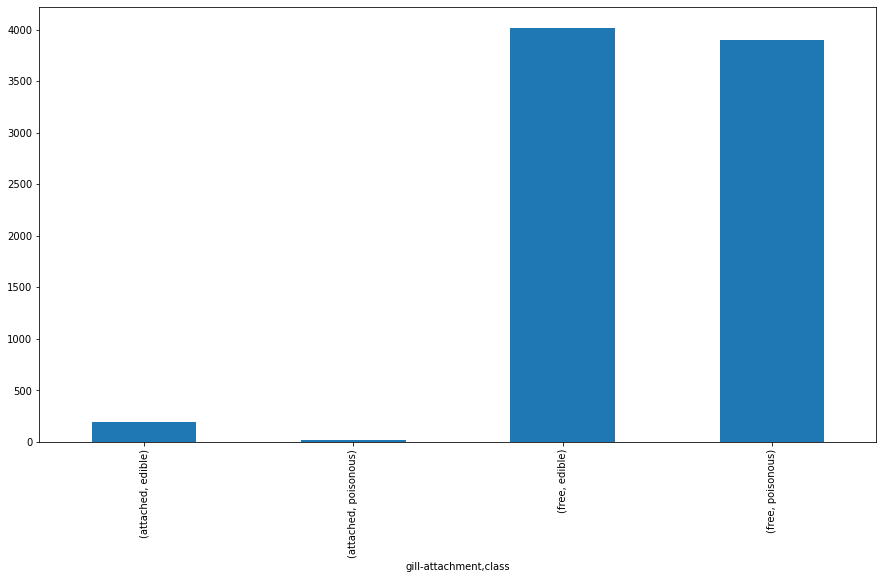

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['gill-attachment'])['class'].value_counts().plot(kind='bar')
plt.show()

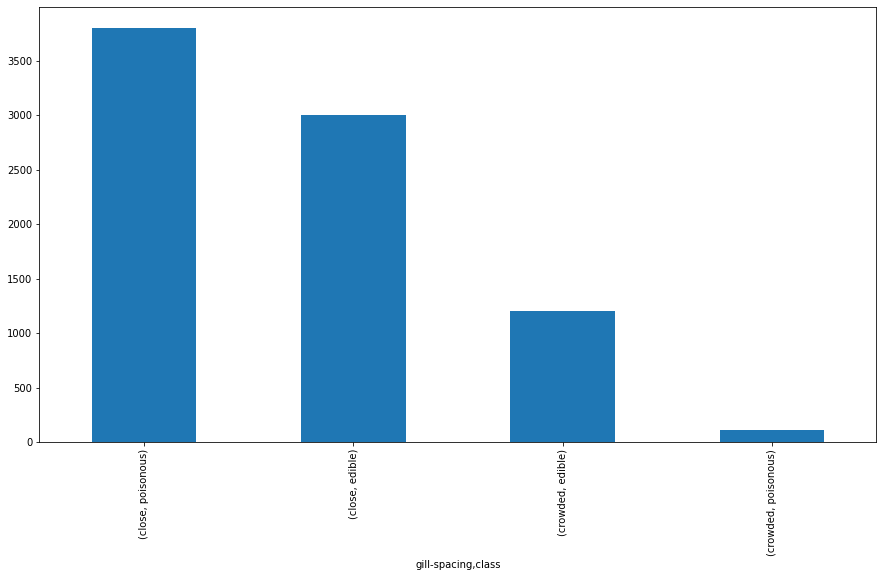

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['gill-spacing'])['class'].value_counts().plot(kind='bar')
plt.show()

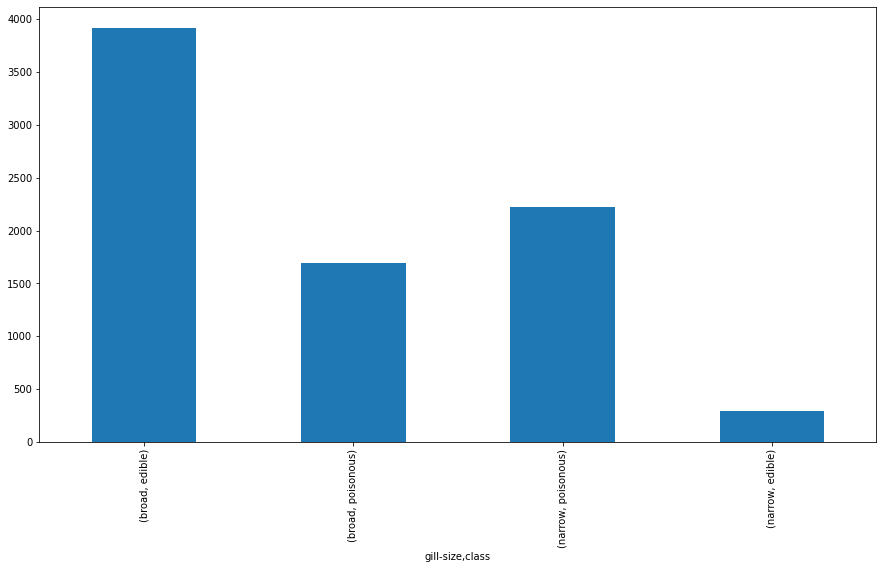

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['gill-size'])['class'].value_counts().plot(kind='bar')
plt.show()

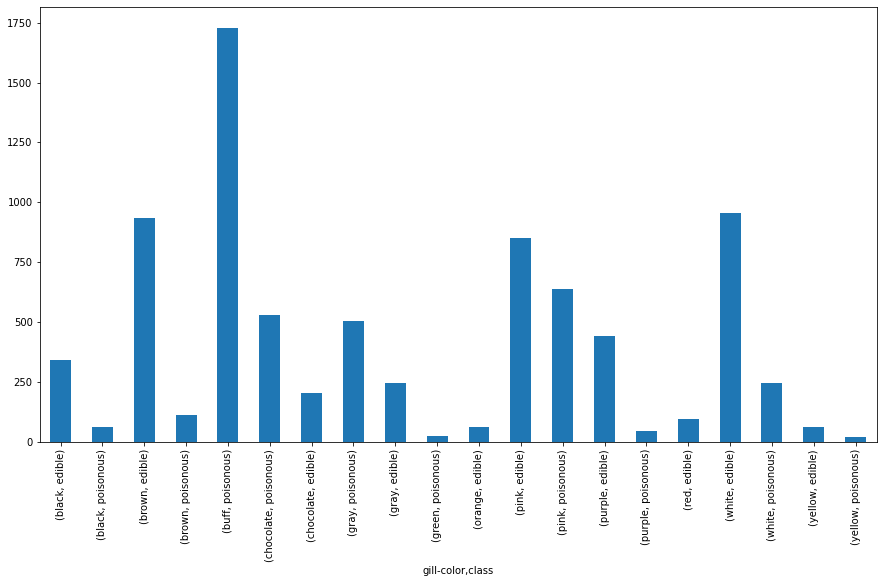

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['gill-color'])['class'].value_counts().plot(kind='bar')
plt.show()

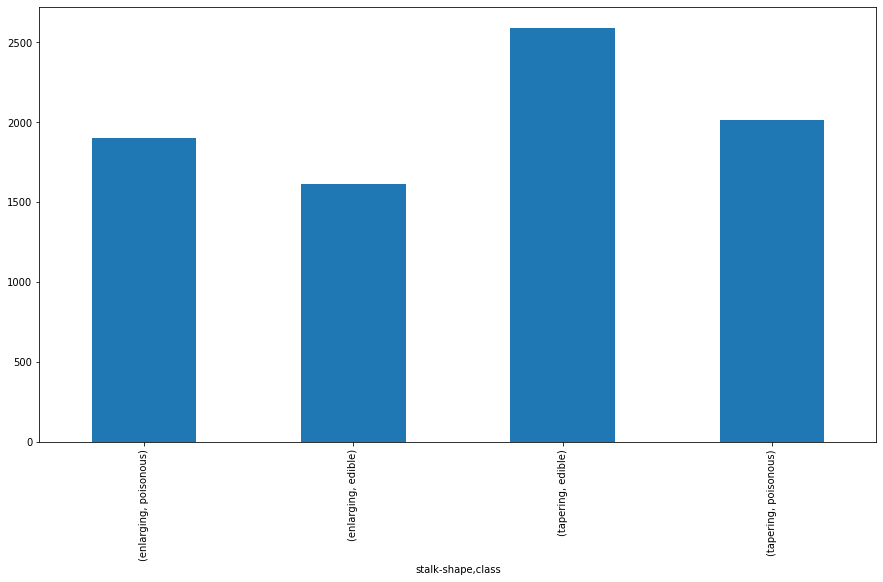

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['stalk-shape'])['class'].value_counts().plot(kind='bar')
plt.show()

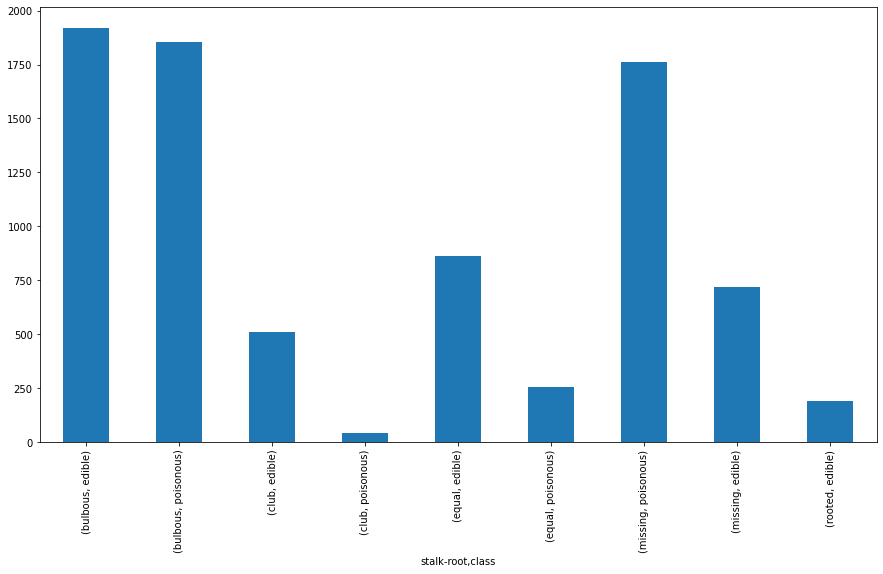

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['stalk-root'])['class'].value_counts().plot(kind='bar')
plt.show()

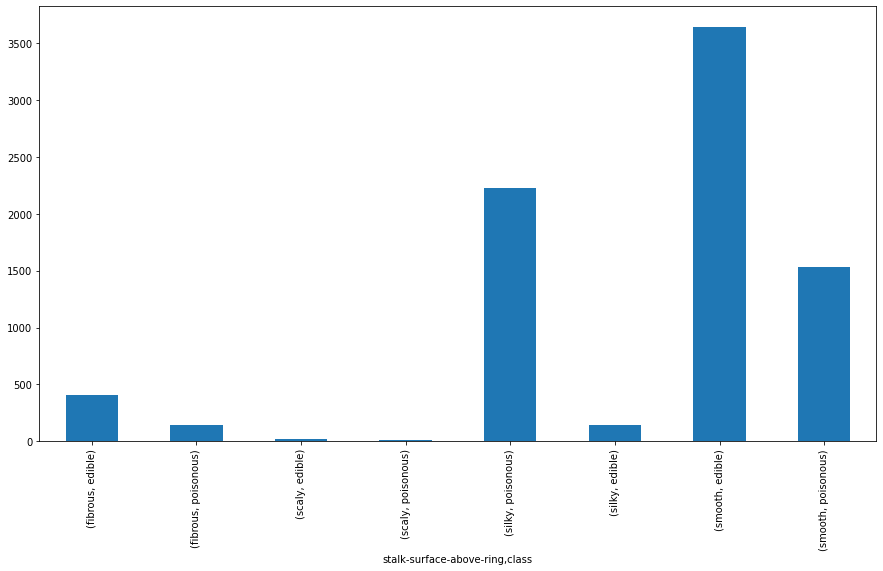

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['stalk-surface-above-ring'])['class'].value_counts().plot(kind='bar')
plt.show()

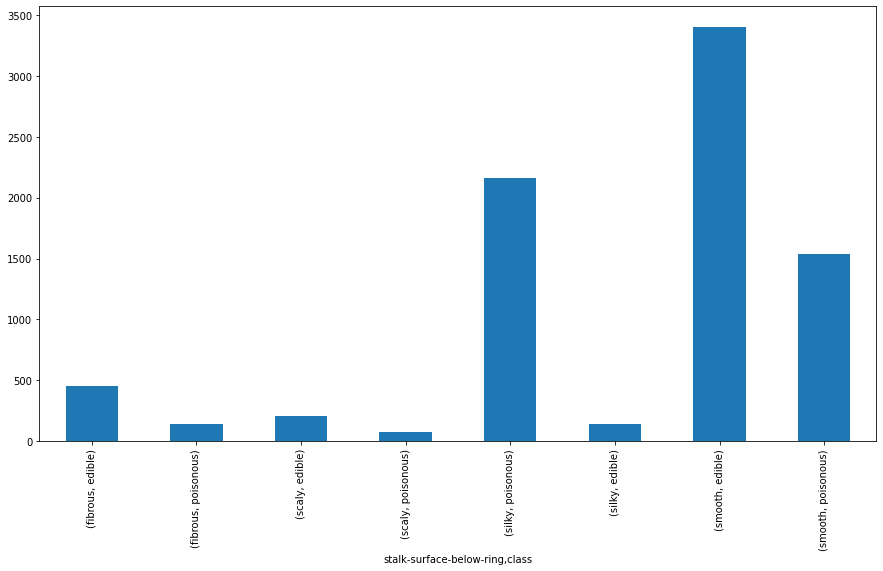

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['stalk-surface-below-ring'])['class'].value_counts().plot(kind='bar')
plt.show()

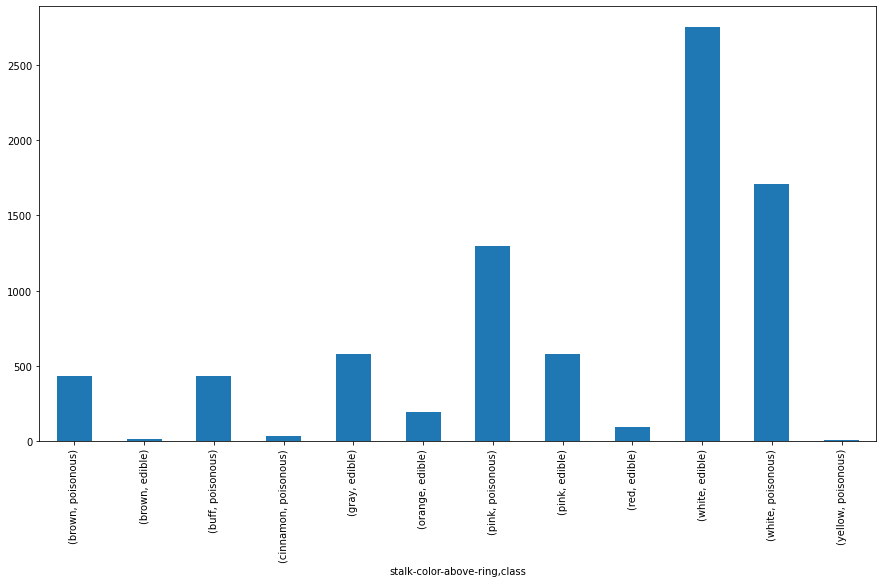

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['stalk-color-above-ring'])['class'].value_counts().plot(kind='bar')
plt.show()

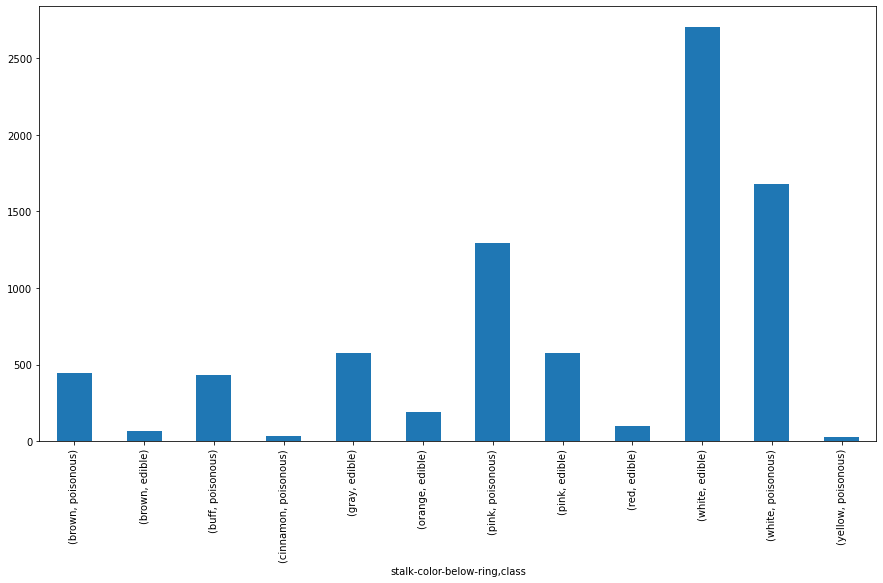

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['stalk-color-below-ring'])['class'].value_counts().plot(kind='bar')
plt.show()

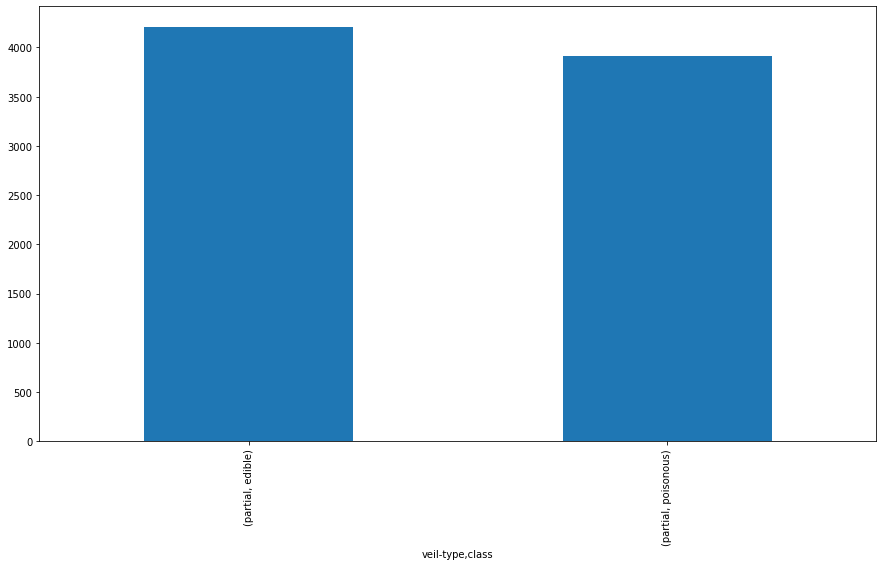

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['veil-type'])['class'].value_counts().plot(kind='bar')
plt.show()

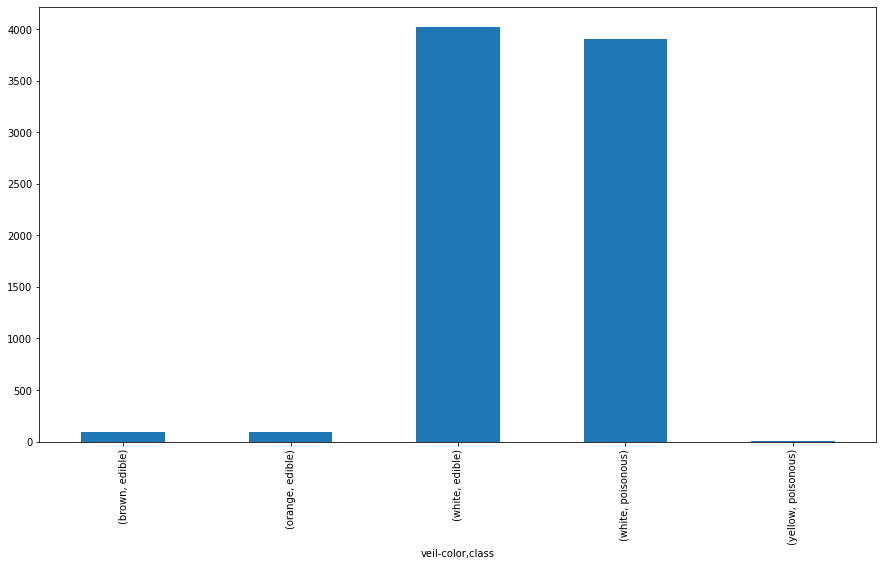

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['veil-color'])['class'].value_counts().plot(kind='bar')
plt.show()

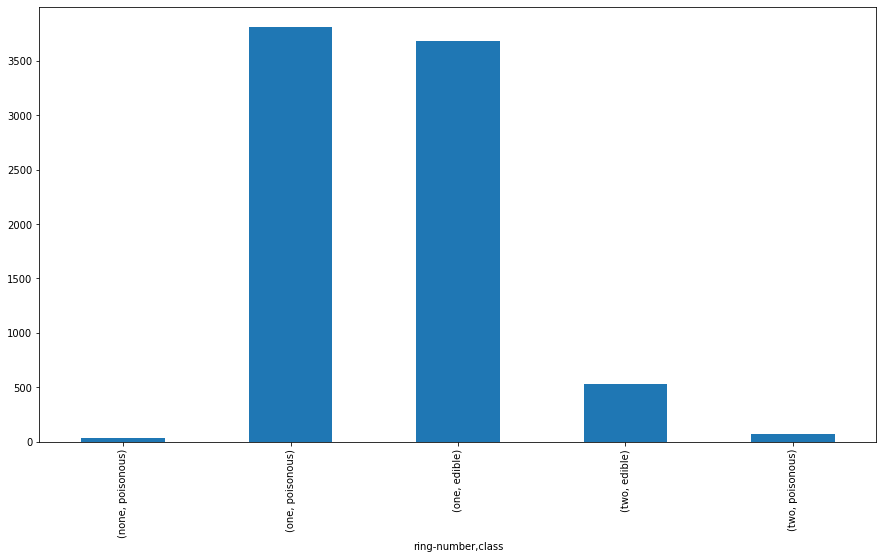

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['ring-number'])['class'].value_counts().plot(kind='bar')
plt.show()

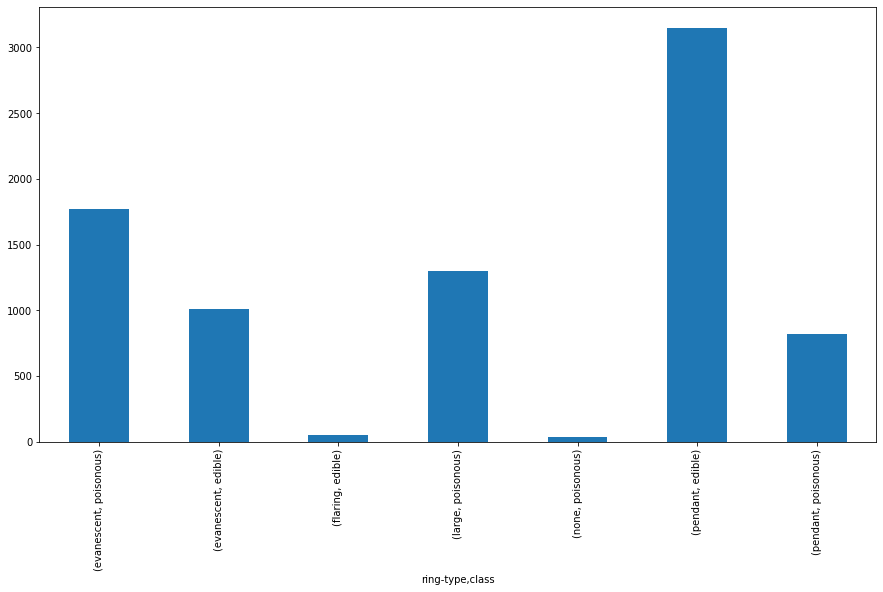

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['ring-type'])['class'].value_counts().plot(kind='bar')
plt.show()

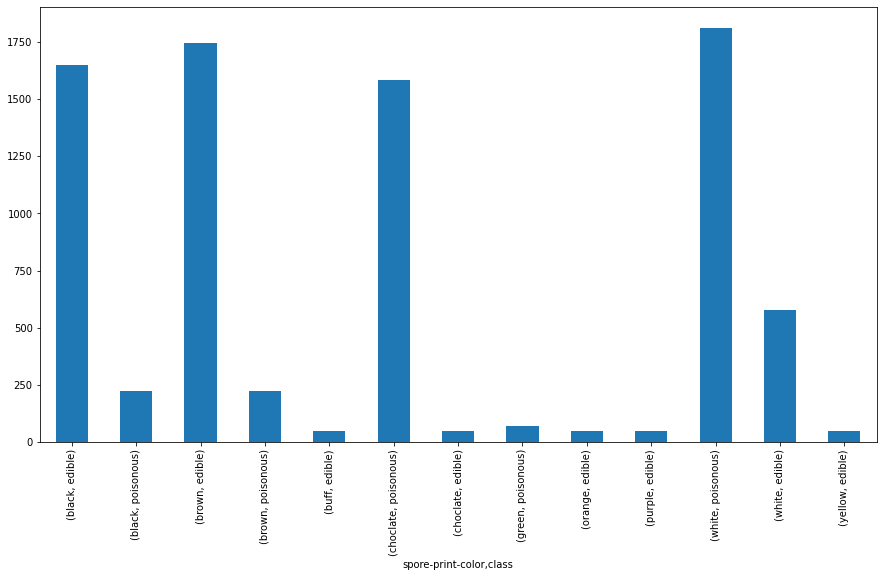

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['spore-print-color'])['class'].value_counts().plot(kind='bar')
plt.show()

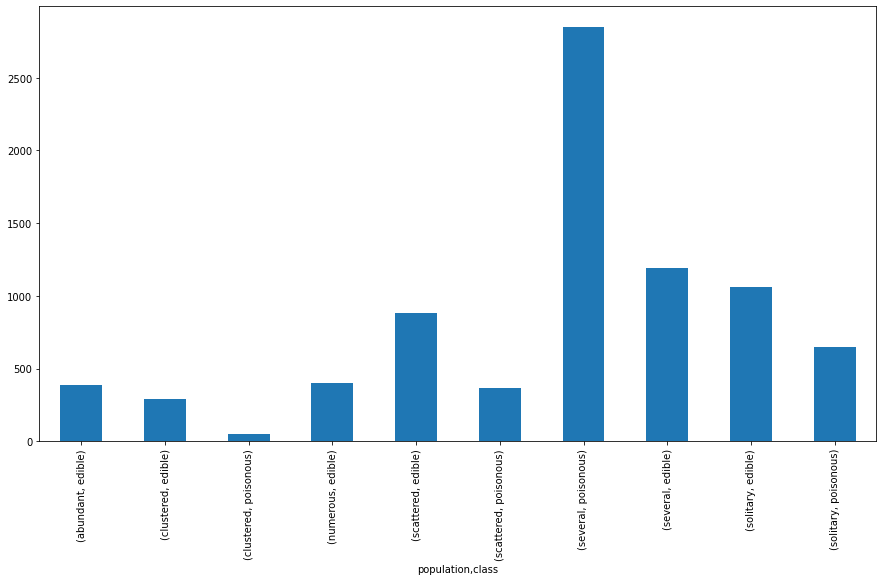

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['population'])['class'].value_counts().plot(kind='bar')
plt.show()

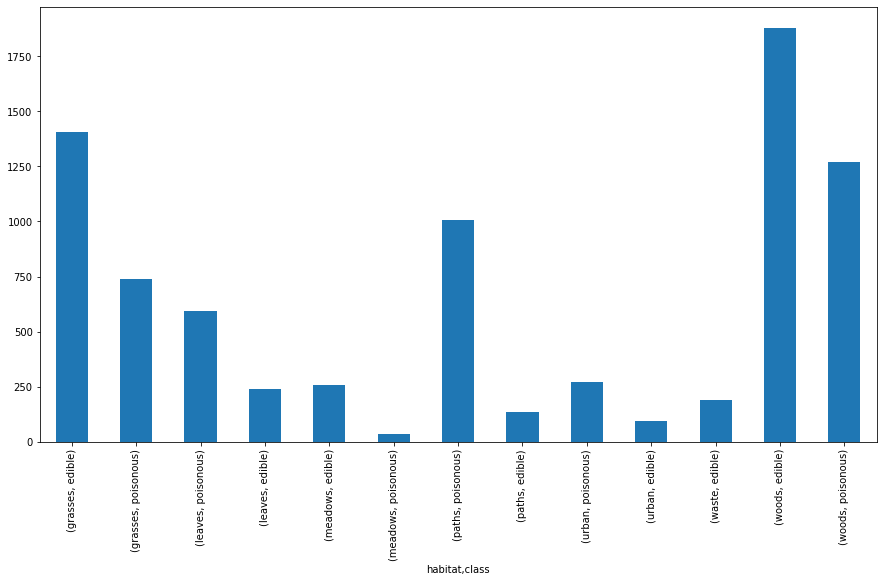

In [ ]:
plt.figure(figsize=(15, 8))
data.groupby(['habitat'])['class'].value_counts().plot(kind='bar')
plt.show()

# **MODEL BUILDING**

Splitting the Target And Feature in the Data Set

In [ ]:
y=data['class']
x=data.drop(['class'],axis=1)


Importing The Classification Algorithm Libraries, metric Libraries and Label Encoder for encode the Label Data into numeric

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder


Label Encoder use to convert into numeric form but it shows the ranking order so it shoud not use if there is no ranking of values in datas

In [ ]:
Encoder_x=LabelEncoder()
for col in x.columns:
    x[col]=Encoder_x.fit_transform(x[col])
Encoder_y=LabelEncoder()


In [ ]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,1,0,1,0,0,2,3,3,7,7,0,2,1,4,0,3,4
1,2,3,9,0,0,1,0,0,0,0,1,3,3,7,7,0,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,1,0,1,3,3,7,7,0,2,1,4,1,2,2
3,2,2,8,0,7,1,0,1,1,0,2,3,3,7,7,0,2,1,4,0,3,4
4,2,3,3,1,6,1,1,0,0,1,2,3,3,7,7,0,2,1,0,1,0,0


In [ ]:
y

0       poisonous
1          edible
2          edible
3       poisonous
4          edible
          ...    
8119       edible
8120       edible
8121       edible
8122    poisonous
8123       edible
Name: class, Length: 8124, dtype: object

Splitting the Training And Testing Data To validate the data here i have use 33% test size and 77% train size and enable the random state to avoid random selection on eachtime of execution

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33, random_state=1)

In [ ]:
x_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6992,4,2,7,1,3,1,0,1,2,1,3,2,3,7,5,0,2,1,0,7,4,1
616,3,0,3,1,6,1,1,0,7,1,2,3,3,7,7,0,2,1,0,0,0,0
2623,3,0,0,0,6,1,0,0,8,1,0,3,3,5,3,0,2,1,4,0,5,6
2772,2,2,7,0,6,1,0,0,1,1,0,3,3,3,5,0,2,1,4,1,4,6
976,0,2,8,0,1,1,0,0,1,0,1,3,3,7,7,0,2,1,4,0,2,0


In [ ]:
x_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1392,3,3,8,1,6,1,1,0,3,1,2,0,0,7,7,0,2,1,0,0,0,0
4051,2,0,5,1,2,1,1,1,8,0,0,3,3,7,7,0,2,1,4,1,4,6
3725,2,3,8,1,2,1,1,1,4,0,0,3,3,7,7,0,2,1,4,1,4,6
7177,4,3,0,1,4,1,0,1,2,1,3,2,2,5,7,0,2,1,0,7,4,1
103,2,2,9,0,0,1,0,0,1,0,4,3,1,7,7,0,2,1,4,0,5,3


**Using KNN algorithm**

In [ ]:
knn=KNeighborsClassifier( n_neighbors=3)
knn.fit(x_train,y_train)
knn_predict=knn.predict(x_test)
accuracy_score(knn_predict,y_test)

0.999627004848937

**Using DecisionTree Algorithm**

In [ ]:
dst=DecisionTreeClassifier()
dst.fit(x_train,y_train)
dst_predict=dst.predict(x_test)
accuracy_score(dst_predict,y_test)

1.0

**Using RandomForest Ensemble Algorithm**

In [ ]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
RF_predict=RF.predict(x_test)
accuracy_score(RF_predict,y_test)

1.0

**Using GaussianNaive Bayes Algorithm**

In [ ]:
NB=GaussianNB()
NB.fit(x_train,y_train)
NB_predict=NB.predict(x_test)
accuracy_score(NB_predict,y_test)

0.8769116001491981

## **Using OneHotEncoding Method**

In [ ]:
Y=data['class']
X1=data.drop(['class'],axis=1)

Importing OneHotEncoder Library

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
encode=OneHotEncoder()
X=encode.fit_transform(X1)

Spliting training and testing Data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y, test_size=0.33,random_state=1)

In [ ]:
X_train

<5443x117 sparse matrix of type '<class 'numpy.float64'>'
	with 119746 stored elements in Compressed Sparse Row format>

**Using KNN Algorithm**

In [ ]:
Knn=KNeighborsClassifier( n_neighbors=3)
Knn.fit(X_train,Y_train)
Knn_predict=Knn.predict(X_test)
accuracy_score(Knn_predict,Y_test)

1.0

**Using DesisionTree Algorithm**

In [ ]:
Dst=DecisionTreeClassifier()
Dst.fit(X_train,Y_train)
Dst_predict=Dst.predict(X_test)
accuracy_score(Dst_predict,Y_test)

1.0

**Using RandomForest Algorithm**

In [ ]:
RRF=RandomForestClassifier()
RRF.fit(X_train,Y_train)
RRF_predict=RRF.predict(X_test)
accuracy_score(RRF_predict,Y_test)

1.0

**Using Gaussian Navie Bayes Algorithm**

In [ ]:
GNB=GaussianNB()
GNB.fit(X_train.todense(),Y_train)
GNB_predict=GNB.predict(X_test.todense())
accuracy_score(GNB_predict,Y_test)

0.958970533383066

Importing Pickle library and convert the file into pickle file for the backend of Mushroom Classification App

Here i have used OneHotEncoding and RandomForest Classifier Algorithm for the deployment

In [ ]:
import pickle
rando_forest_model=RRF
encodes=encode

In [ ]:
model_name='model.pkl'
encode_name='encode.pkl'

model = open(model_name,'wb')
pickle.dump(rando_forest_model,model)
encode = open(encode_name,'wb')
pickle.dump(encodes,encode)

model.close()
encode.close()


In [ ]:
model = open('model.pkl','rb')
model = pickle.load(model)

In [ ]:
encode = open('encode.pkl','rb')
encode = pickle.load(encode)

In [ ]:
X=data.drop(['class'],axis=1)

In [ ]:
X_encode=encode.transform(X)

In [ ]:
predict=model.predict(X_encode)

In [ ]:
predict

array(['poisonous', 'edible', 'edible', ..., 'edible', 'poisonous',
       'edible'], dtype=object)

In [ ]:
TY=data['class']


In [ ]:
TY

0       poisonous
1          edible
2          edible
3       poisonous
4          edible
          ...    
8119       edible
8120       edible
8121       edible
8122    poisonous
8123       edible
Name: class, Length: 8124, dtype: object

Validation of Model

In [ ]:
accuracy_score(TY,predict)

1.0